In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data = pd.read_csv("./Camera_Traffic_Counts2_20250918.csv")
weather = pd.read_csv("./Austin 2019-01-01 to 2023-07-22.csv")
# Filter the Data for Weather for only 2019
weather["datetime"] = pd.to_datetime(weather["datetime"], format='%m/%d/%y')
weather_2019 = weather[weather["datetime"].dt.year == 2019]
# Convert Weather 2019 into components
# Extract Month, Day, and Year into new columns
weather['Month'] = weather['datetime'].dt.month
weather['Day'] = weather['datetime'].dt.day
weather['Year'] = weather['datetime'].dt.year
# Merge the two datasets together
merged_df = pd.merge(data, weather, on = ["Month", "Day", "Year"], how = "inner")
merged_df


,Record ID,ATD Device ID,Read Date,Intersection Name,Direction,Movement,Heavy Vehicle,Volume,Speed Average (Miles Per Hour),Speed StdDev,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,595bf8744b9dd96b150f2fff20d9a315,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,EASTBOUND,LEFT TURN,True,1,11.000,0.000,...,2.1,1,NaN,2019-11-07T06:49:47,2019-11-07T17:39:06,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
1,78739969a39bc2a116e12718a1bb3f5b,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,NORTHBOUND,LEFT TURN,False,1,8.000,0.000,...,2.1,1,NaN,2019-11-07T06:49:47,2019-11-07T17:39:06,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
2,1cd581df7936da3ff89de600aa45b6b4,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,NORTHBOUND,THRU,False,9,27.000,5.766,...,2.1,1,NaN,2019-11-07T06:49:47,2019-11-07T17:39:06,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
3,fbc38f488bd0b35d01e7c55deaff16c8,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,NORTHBOUND,THRU,True,2,32.000,4.243,...,2.1,1,NaN,2019-11-07T06:49:47,2019-11-07T17:39:06,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
4,40e1f863f1aacc15f4c6ada55b59839f,6549,11/07/2019 12:00:00 AM,WEST GATE BLVD / JONES RD,SOUTHBOUND,LEFT TURN,False,1,12.000,0.000,...,2.1,1,NaN,2019-11-07T06:49:47,2019-11-07T17:39:06,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14717619,1a037682821ff56b90aecbd5e4e3a479,6163,09/09/2019 11:45:00 PM,MC KINNEY FALLS PKWY / WILLIAM CANNON DR,SOUTHBOUND,THRU,True,12,14.500,29.374,...,19.1,9,NaN,2019-09-09T07:12:00,2019-09-09T19:44:11,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
14717620,f50b7acac98ac6b96a5f219edbf0f481,6163,09/09/2019 11:45:00 PM,MC KINNEY FALLS PKWY / WILLIAM CANNON DR,WESTBOUND,THRU,False,2,14.000,1.414,...,19.1,9,NaN,2019-09-09T07:12:00,2019-09-09T19:44:11,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
14717621,9b61ea8a4fd796b598df8bbf389195cb,6163,09/09/2019 11:45:00 PM,MC KINNEY FALLS PKWY / WILLIAM CANNON DR,WESTBOUND,THRU,True,1,48.000,0.000,...,19.1,9,NaN,2019-09-09T07:12:00,2019-09-09T19:44:11,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
14717622,92fe597b103e3c0af4c2d8f20c74682b,6549,09/09/2019 11:00:00 PM,WEST GATE BLVD / JONES RD,SOUTHBOUND,RIGHT TURN,False,2,12.000,0.000,...,19.1,9,NaN,2019-09-09T07:12:00,2019-09-09T19:44:11,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."


In [10]:
weather.shape

(1664, 36)

In [7]:
merged_df.columns

Index(['Record ID', 'ATD Device ID', 'Read Date', 'Intersection Name',
       'Direction', 'Movement', 'Heavy Vehicle', 'Volume',
       'Speed Average (Miles Per Hour)', 'Speed StdDev',
       'Seconds in Zone Average', 'Seconds in Zone StdDev', 'Month', 'Day',
       'Year', 'Hour', 'Minute', 'Day of Week', 'Bin Duration (Seconds)',
       'name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14717624 entries, 0 to 14717623
Data columns (total 52 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Record ID                       object        
 1   ATD Device ID                   int64         
 2   Read Date                       object        
 3   Intersection Name               object        
 4   Direction                       object        
 5   Movement                        object        
 6   Heavy Vehicle                   bool          
 7   Volume                          int64         
 8   Speed Average (Miles Per Hour)  float64       
 9   Speed StdDev                    float64       
 10  Seconds in Zone Average         float64       
 11  Seconds in Zone StdDev          float64       
 12  Month                           int64         
 13  Day                             int64         
 14  Year                            int64         
 

In [3]:
merged_df['severerisk']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
            ..
14717619   NaN
14717620   NaN
14717621   NaN
14717622   NaN
14717623   NaN
Name: severerisk, Length: 14717624, dtype: float64

In [8]:
merged_df['visibility'].max()

9.9

Libraries imported successfully
Memory optimization functions defined
Loading data...
Traffic data loaded: 14,717,624 rows
Initial memory usage: 0.02 MB
Final memory usage: 0.01 MB
Reduced by 30.8%
Weather data filtered: 365 rows
Merging datasets...
Using sample of 1,471,762 traffic records
Initial memory usage: 327.91 MB
Final memory usage: 67.93 MB
Reduced by 79.3%
Merged dataset: 1,471,762 rows
Columns: 18
Creating specified features...
✓ Created Time feature
Creating lag features...


/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_32186/2102802321.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(['ATD Device ID', 'Movement'])['Volume'].shift(lag)
/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_32186/2102802321.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(['ATD Device ID', 'Movement'])['Volume'].shift(lag)
/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_32186/2102802321.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

✓ Created Lagged Volume features
Encoding Day of Week...
✓ Created Day of Week features
Creating holiday feature...
✓ Created Holiday feature
✓ Using Heavy Vehicle feature
✓ Using Precipitation feature
✓ Using Visibility feature
✓ Using Temperature feature
All specified features created successfully!
Preparing feature sets...

=== FEATURE SUMMARY ===
Base features: ['time', 'Heavy Vehicle']
Weather features: ['precip', 'visibility', 'temp']
Lag features: ['lag_1', 'lag_2', 'lag_4']
Day of Week features: 7 categories
Special features: ['holiday']
Total features: 16
Target variable: Volume

Splitting data...
Split completed: Train=1,138,887, Val=132,024, Test=200,851
Preparing feature matrices...
Training set: (1138887, 16)
Validation set: (132024, 16)
Test set: (200851, 16)
Starting model training with specified features...
Training Random Forest with 50 trees...
Training completed in 66.31 seconds

=== Model Performance ===
MSE: 2747.81
RMSE: 52.4196
MAE: 22.5922
R-squared: 0.3076


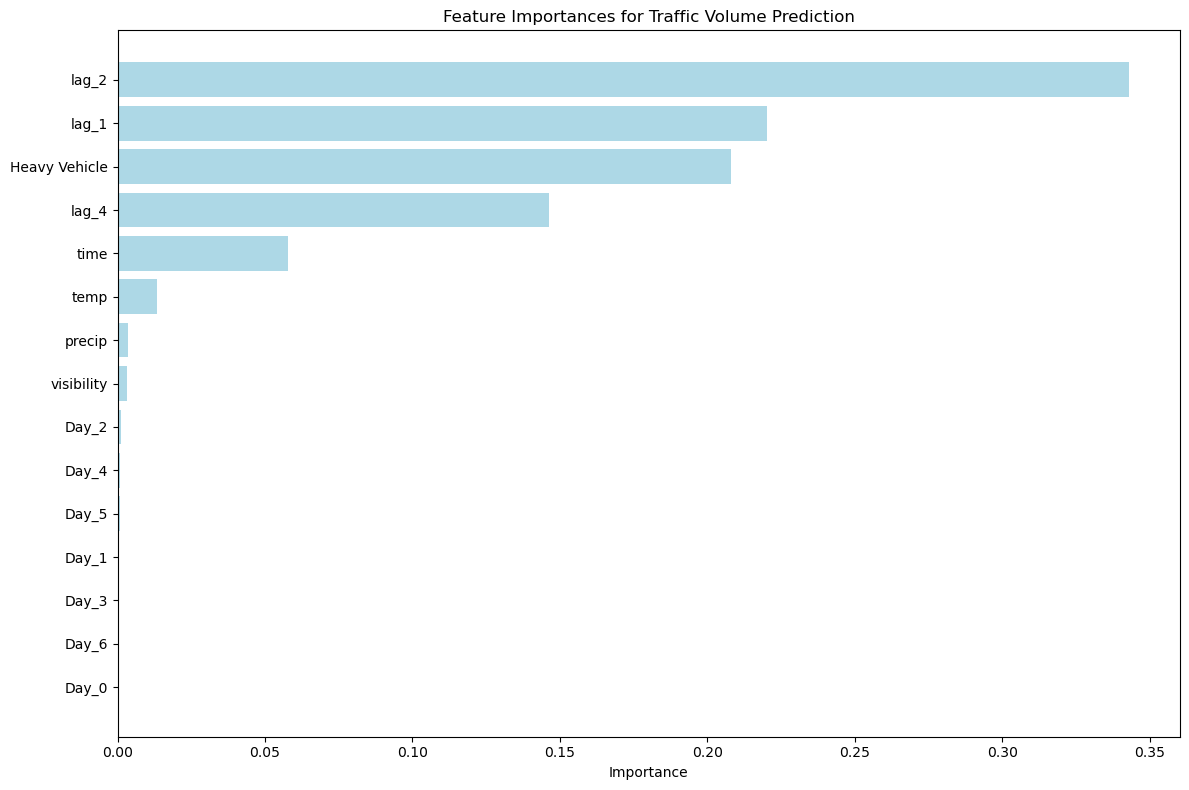


Top 15 Most Important Features:
      Feature  Importance
        lag_2    0.343162
        lag_1    0.220183
Heavy Vehicle    0.208151
        lag_4    0.146299
         time    0.057761
         temp    0.013195
       precip    0.003373
   visibility    0.003304
        Day_2    0.001279
        Day_4    0.000855
        Day_5    0.000651
        Day_1    0.000588
        Day_3    0.000586
        Day_6    0.000308
        Day_0    0.000225

Evaluating on test set...
=== Test Set Performance ===
Test MSE: 2224.32
Test RMSE: 47.1627
Test MAE: 21.0494
Test R-squared: 0.3263

=== Additional Analysis ===


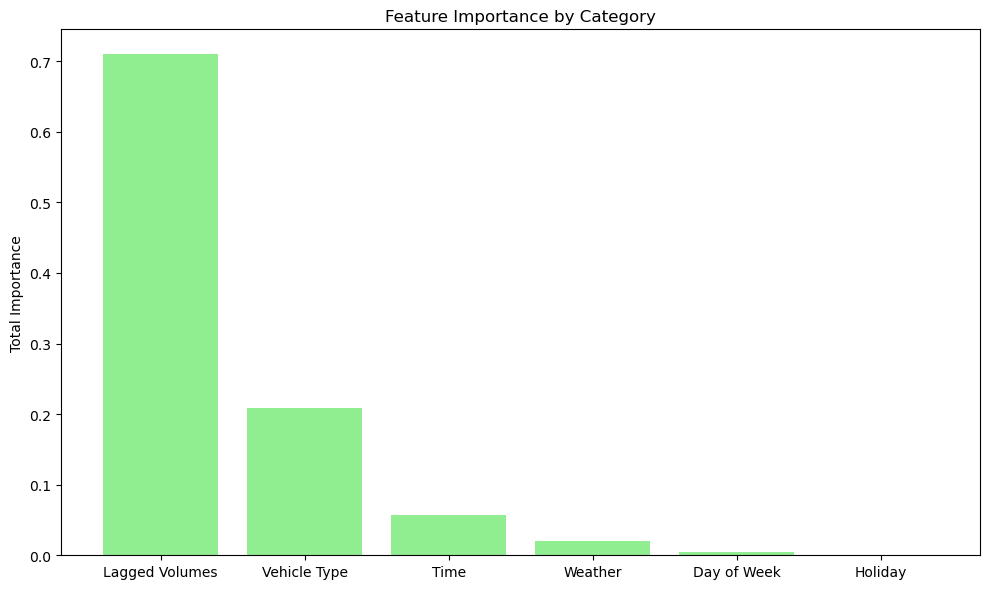

Feature Importance by Category:
  Lagged Volumes: 0.710
  Vehicle Type: 0.208
  Time: 0.058
  Weather: 0.020
  Day of Week: 0.004
  Holiday: 0.000


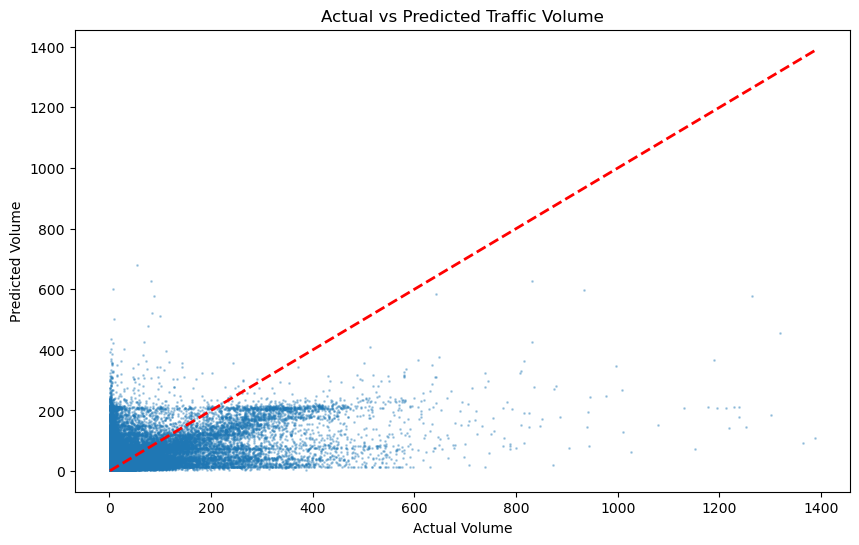

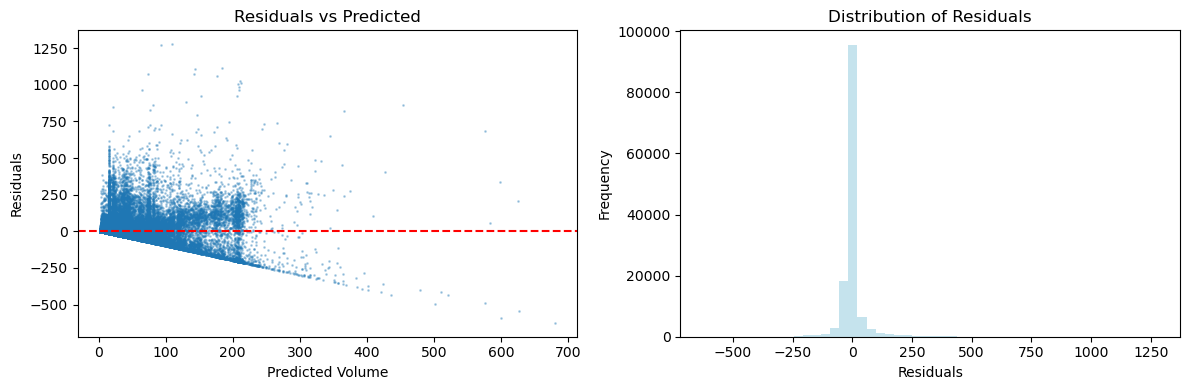


Model training and evaluation completed successfully!

--- Training Random Forest Regressor (Inference) ---
RF Validation R-squared: 0.3074
RF Validation MAE: 22.59
RF Validation MSE: 2748.48
✓ Saved Random Forest Feature Importance chart.

--- Training Ridge Regression (Inference) ---
Ridge Validation R-squared: 0.2247
Ridge Validation MAE: 25.95
Ridge Validation MSE: 3076.66
✓ Saved Ridge Coefficients chart.


<Figure size 1000x600 with 0 Axes>

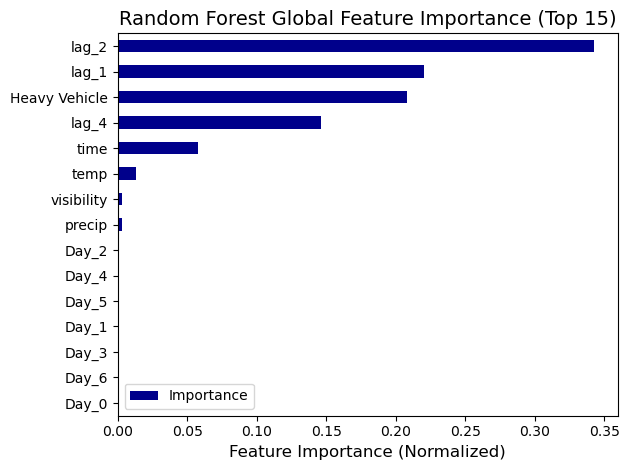

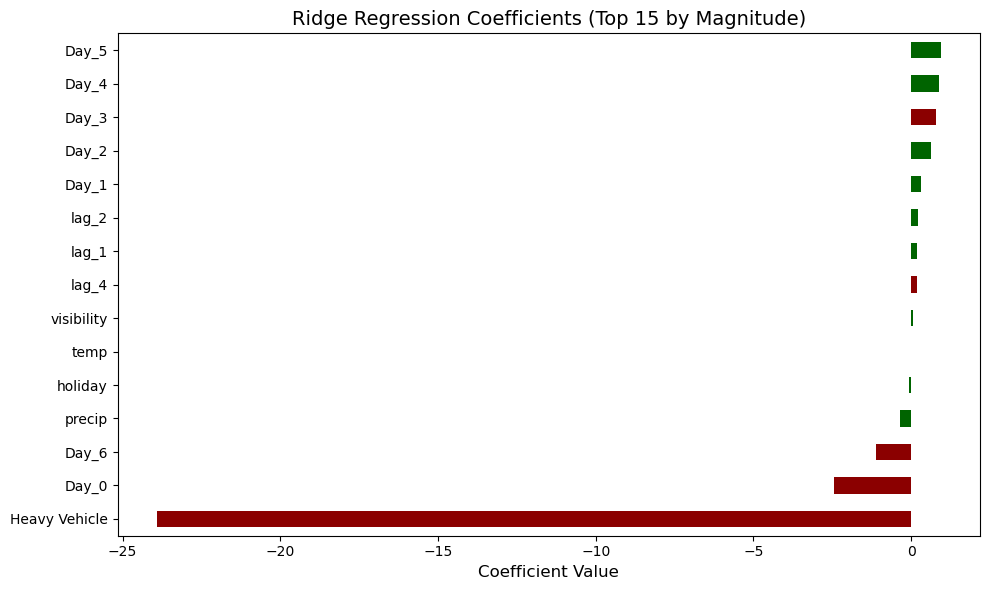

In [13]:
# Cell 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time

print("Libraries imported successfully")

# Cell 2: Memory optimization functions
def reduce_memory_usage(df):
    """Reduce dataframe memory usage by downcasting numeric columns"""
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Initial memory usage: {start_mem:.2f} MB")
    
    # Downcast numeric columns
    for col in df.select_dtypes(include=['int']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    
    # Convert bool to int8
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype('int8')
    
    # Convert object columns to category if they have low cardinality
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() / len(df) < 0.5:
            df[col] = df[col].astype('category')
    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Final memory usage: {end_mem:.2f} MB")
    print(f"Reduced by {100 * (start_mem - end_mem) / start_mem:.1f}%")
    
    return df

print("Memory optimization functions defined")

# Cell 3: Load and sample data
print("Loading data...")

# Load data with optimized dtypes
dtypes = {
    'ATD Device ID': 'int32',
    'Volume': 'int32',
    'Month': 'int8',
    'Day': 'int8', 
    'Year': 'int16',
    'Hour': 'int8',
    'Minute': 'int8',
    'Day of Week': 'int8',
    'Bin Duration (Seconds)': 'int32',
    'Heavy Vehicle': 'bool'
}

# Load only necessary columns to save memory
usecols = [
    'ATD Device ID', 'Read Date', 'Direction', 
    'Movement', 'Heavy Vehicle', 'Volume', 'Speed Average (Miles Per Hour)',
    'Month', 'Day', 'Year', 'Hour', 'Minute', 'Day of Week'
]

data = pd.read_csv("./Camera_Traffic_Counts2_20250918.csv", 
                   usecols=usecols, 
                   dtype=dtypes,
                   low_memory=False)

print(f"Traffic data loaded: {len(data):,} rows")

# Load and filter weather data
weather_cols = ['datetime', 'temp', 'precip', 'visibility', 'humidity']
weather = pd.read_csv("./Austin 2019-01-01 to 2023-07-22.csv", 
                      usecols=weather_cols, 
                      low_memory=False)

weather["datetime"] = pd.to_datetime(weather["datetime"], format='%m/%d/%y')
weather_2019 = weather[weather["datetime"].dt.year == 2019].copy()

# Extract date components
weather_2019['Month'] = weather_2019['datetime'].dt.month.astype('int8')
weather_2019['Day'] = weather_2019['datetime'].dt.day.astype('int8')
weather_2019['Year'] = weather_2019['datetime'].dt.year.astype('int16')

# Reduce weather data memory
weather_2019 = reduce_memory_usage(weather_2019)

print(f"Weather data filtered: {len(weather_2019):,} rows")

# Cell 4: Merge and sample
print("Merging datasets...")

# Take a sample of traffic data before merging to save memory
sample_fraction = 0.1  # 10% of data - adjust based on your RAM
if len(data) > 1000000:  # Only sample if we have lots of data
    data_sample = data.sample(frac=sample_fraction, random_state=42)
else:
    data_sample = data.copy()

print(f"Using sample of {len(data_sample):,} traffic records")

# Merge sampled data with weather
merged_df = pd.merge(data_sample, weather_2019, on=["Month", "Day", "Year"], how="inner")
merged_df = reduce_memory_usage(merged_df)

print(f"Merged dataset: {len(merged_df):,} rows")
print(f"Columns: {len(merged_df.columns)}")

# Clean up memory
del data, data_sample, weather, weather_2019

# Cell 5: Feature engineering with specified features
print("Creating specified features...")

# Convert Read Date to datetime
merged_df['Read Date'] = pd.to_datetime(merged_df['Read Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# 1. TIME FEATURE: Travel patterns vary throughout the day
merged_df['time'] = merged_df['Hour'] + merged_df['Minute'] / 60
print("✓ Created Time feature")

# 2. LAGGED VOLUMES: Captures short-term dynamics
print("Creating lag features...")
merged_df = merged_df.sort_values(['ATD Device ID', 'Movement', 'Read Date'])

for lag in [1, 2, 4]:  # Previous 15min, 30min, 1 hour
    merged_df[f'lag_{lag}'] = (
        merged_df.groupby(['ATD Device ID', 'Movement'])['Volume'].shift(lag)
    )
print("✓ Created Lagged Volume features")

# 3. DAY OF WEEK: Travel patterns vary throughout the week (One-hot encoded)
print("Encoding Day of Week...")
day_onehot = pd.get_dummies(merged_df['Day of Week'], prefix='Day', sparse=True).astype('int8')
merged_df = pd.concat([merged_df, day_onehot], axis=1)
print("✓ Created Day of Week features")

# 4. HOLIDAY: Travel patterns deviate around major holidays
print("Creating holiday feature...")
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])
dates = merged_df['datetime'].dt

# Define holiday periods
holiday_periods = [
    ("10-04", "10-06"),   # ACL 1
    ("10-11", "10-13"),   # ACL 2  
    ("11-27", "11-30"),   # Thanksgiving
    ("12-22", "12-28"),   # Christmas Break
    ("03-16", "03-21"),   # Spring Break
]

# Convert month-day to day-of-year range
doy = dates.dayofyear
is_holiday = pd.Series(False, index=merged_df.index)

for start, end in holiday_periods:
    start_doy = pd.to_datetime(dates.year.astype(str) + "-" + start).dt.dayofyear
    end_doy = pd.to_datetime(dates.year.astype(str) + "-" + end).dt.dayofyear
    is_holiday |= (doy >= start_doy) & (doy <= end_doy)

merged_df["holiday"] = is_holiday.astype('int8')
print("✓ Created Holiday feature")



# 6. HEAVY VEHICLE: Larger vehicles affect turns
# Already in dataset as 'Heavy Vehicle' (converted to int8 in memory optimization)
print("✓ Using Heavy Vehicle feature")

# 7. WEATHER FEATURES
# Precipitation - Severe weather affects travel patterns
if 'precip' in merged_df.columns:
    merged_df['precip'] = merged_df['precip'].fillna(0)
    print("✓ Using Precipitation feature")

# Visibility - Low visibility makes driving less safe
if 'visibility' in merged_df.columns:
    merged_df['visibility'] = merged_df['visibility'].fillna(merged_df['visibility'].median())
    print("✓ Using Visibility feature")

# Temperature - May be more/less likely to drive in drastic temperatures
if 'temp' in merged_df.columns:
    merged_df['temp'] = merged_df['temp'].fillna(merged_df['temp'].median())
    print("✓ Using Temperature feature")

print("All specified features created successfully!")

# Cell 6: Prepare features list based on specified variables
print("Preparing feature sets...")

# Define feature groups based on your specification
base_features = ['time', 'Heavy Vehicle']  # Continuous features

# Weather features
weather_features = []
if 'precip' in merged_df.columns:
    weather_features.append('precip')
if 'visibility' in merged_df.columns:
    weather_features.append('visibility')
if 'temp' in merged_df.columns:
    weather_features.append('temp')

# Lag features
lag_features = ['lag_1', 'lag_2', 'lag_4']

# Categorical features (one-hot encoded)
day_features = [col for col in merged_df.columns if col.startswith('Day_')]

# Special binary feature
special_features = ['holiday']

# Combine all features
feature_columns = (base_features + weather_features + lag_features + 
                   day_features + special_features)

target_column = 'Volume'

print(f"\n=== FEATURE SUMMARY ===")
print(f"Base features: {base_features}")
print(f"Weather features: {weather_features}")
print(f"Lag features: {lag_features}")
print(f"Day of Week features: {len(day_features)} categories")
print(f"Special features: {special_features}")
print(f"Total features: {len(feature_columns)}")
print(f"Target variable: {target_column}")

# Cell 7: Train-validation-test split
print("\nSplitting data...")

# Sort by datetime for time series split
merged_df = merged_df.sort_values('datetime')

# Define split dates
train_mask = merged_df['datetime'] <= '2019-10-19'
val_mask = (merged_df['datetime'] > '2019-10-19') & (merged_df['datetime'] <= '2019-11-24')
test_mask = merged_df['datetime'] > '2019-11-24'

train = merged_df[train_mask].copy()
validation = merged_df[val_mask].copy()
test = merged_df[test_mask].copy()

print(f"Split completed: Train={len(train):,}, Val={len(validation):,}, Test={len(test):,}")

# Prepare feature matrices
print("Preparing feature matrices...")

X_train = train[feature_columns].fillna(0)
y_train = train[target_column]

X_val = validation[feature_columns].fillna(0) 
y_val = validation[target_column]

X_test = test[feature_columns].fillna(0)
y_test = test[target_column]

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Cell 8: Model training function
def train_and_evaluate_rf(X_train, y_train, X_test, y_test, features, 
                         n_estimators=50, max_depth=9, 
                         min_samples_leaf=2, min_samples_split=5, 
                         random_state=42):
    """
    Train Random Forest and evaluate performance
    """
    print(f"Training Random Forest with {n_estimators} trees...")
    
    # Initialize model
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_leaf=min_samples_leaf, 
        min_samples_split=min_samples_split, 
        random_state=random_state,
        n_jobs=-1  # Use all available cores
    )
    
    # Training with timing
    start_time = time.time()
    rf_model.fit(X_train, y_train)
    end_time = time.time()
    
    training_time = end_time - start_time
    print(f"Training completed in {training_time:.2f} seconds")
    
    # Predictions
    y_pred = rf_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\n=== Model Performance ===")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    
    # Feature importances
    rf_importances = pd.DataFrame({
        'Feature': features, 
        'Importance': rf_model.feature_importances_
    })
    rf_importances = rf_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # Plot top features
    plt.figure(figsize=(12, 8))
    top_features = rf_importances.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'], color='lightblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances for Traffic Volume Prediction')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Print top features
    print("\nTop 15 Most Important Features:")
    print(rf_importances.head(15).to_string(index=False))
    
    return rf_model, y_pred, rf_importances

# Cell 9: Train the model
print("Starting model training with specified features...")

model, predictions, importances = train_and_evaluate_rf(
    X_train, y_train, X_val, y_val, feature_columns,
    n_estimators=50,    # Reduced for faster training
    max_depth=9,
    min_samples_leaf=2,
    min_samples_split=5
)

# Cell 10: Test set evaluation
print("\nEvaluating on test set...")
test_predictions = model.predict(X_test)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("=== Test Set Performance ===")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R-squared: {test_r2:.4f}")

# Cell 11: Additional analysis and visualizations
print("\n=== Additional Analysis ===")

# Feature importance by category
def analyze_feature_categories(importances_df, feature_columns):
    """Analyze feature importance by category"""
    categories = {
        'Time': ['time'],
        'Lagged Volumes': ['lag_1', 'lag_2', 'lag_4'],
        'Day of Week': [f for f in feature_columns if f.startswith('Day_')],
        'Weather': ['precip', 'visibility', 'temp'],
        'Vehicle Type': ['Heavy Vehicle'],
        'Holiday': ['holiday']
    }
    
    category_importance = {}
    for category, features in categories.items():
        category_features = [f for f in features if f in importances_df['Feature'].values]
        if category_features:
            importance_sum = importances_df[importances_df['Feature'].isin(category_features)]['Importance'].sum()
            category_importance[category] = importance_sum
    
    # Plot category importance
    plt.figure(figsize=(10, 6))
    categories_sorted = dict(sorted(category_importance.items(), key=lambda x: x[1], reverse=True))
    plt.bar(categories_sorted.keys(), categories_sorted.values(), color='lightgreen')
    plt.ylabel('Total Importance')
    plt.title('Feature Importance by Category')
    plt.tight_layout()
    plt.show()
    
    print("Feature Importance by Category:")
    for category, importance in categories_sorted.items():
        print(f"  {category}: {importance:.3f}")

analyze_feature_categories(importances, feature_columns)

# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, predictions, alpha=0.3, s=1)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.show()

# Residuals analysis
residuals = y_val - predictions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(predictions, residuals, alpha=0.3, s=1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Volume')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, alpha=0.7, color='lightblue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

print("\nModel training and evaluation completed successfully!")


from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_inf, y_train_inf, X_val_inf, y_val_inf are defined after your fixed feature engineering cell runs.
X_train_inf = X_train
y_train_inf = y_train
X_val_inf = X_val
y_val_inf = y_val

# 1. Random Forest Regressor (Model Class 1)
print("\n--- Training Random Forest Regressor (Inference) ---")

rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=9,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_inf, y_train_inf)
rf_val_predictions = rf_model.predict(X_val_inf)

# Evaluation Metrics
rf_r2 = r2_score(y_val_inf, rf_val_predictions)
rf_mae = mean_absolute_error(y_val_inf, rf_val_predictions)
rf_mse = mean_squared_error(y_val_inf, rf_val_predictions)
print(f"RF Validation R-squared: {rf_r2:.4f}")
print(f"RF Validation MAE: {rf_mae:.2f}")
print(f"RF Validation MSE: {rf_mse:.2f}")

# Feature Importance (Explanation Method for RF)
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train_inf.columns).sort_values(ascending=False).to_frame(name='Importance')
plt.figure(figsize=(10, 6))
rf_importances.head(15).sort_values(by='Importance').plot(kind='barh', color='darkblue')
plt.title('Random Forest Global Feature Importance (Top 15)', fontsize=14)
plt.xlabel('Feature Importance (Normalized)', fontsize=12)
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
print("✓ Saved Random Forest Feature Importance chart.")


# 2. Ridge Regression (Model Class 2)
print("\n--- Training Ridge Regression (Inference) ---")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_inf, y_train_inf)
ridge_val_predictions = ridge_model.predict(X_val_inf)

# Evaluation Metrics
ridge_r2 = r2_score(y_val_inf, ridge_val_predictions)
ridge_mae = mean_absolute_error(y_val_inf, ridge_val_predictions)
ridge_mse = mean_squared_error(y_val_inf, ridge_val_predictions)
print(f"Ridge Validation R-squared: {ridge_r2:.4f}")
print(f"Ridge Validation MAE: {ridge_mae:.2f}")
print(f"Ridge Validation MSE: {ridge_mse:.2f}")

# Model Coefficients (Explanation Method for Ridge)
ridge_coef = pd.Series(ridge_model.coef_, index=X_train_inf.columns)
ridge_coef_abs = ridge_coef.abs().sort_values(ascending=False).head(15).index

plt.figure(figsize=(10, 6))
ridge_coef.loc[ridge_coef_abs].sort_values().plot(kind='barh', color=ridge_coef.loc[ridge_coef_abs].apply(lambda x: 'darkred' if x < 0 else 'darkgreen'))
plt.title('Ridge Regression Coefficients (Top 15 by Magnitude)', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.tight_layout()
plt.savefig('ridge_coefficients.png')
print("✓ Saved Ridge Coefficients chart.")

In [10]:
merged_df.head()


,ATD Device ID,Read Date,Intersection Name,Direction,Movement,Heavy Vehicle,Volume,Speed Average (Miles Per Hour),Month,Day,...,lag_2,lag_4,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,holiday
260183,6160,2019-08-17 00:30:00,MANCHACA RD / REDD ST,WESTBOUND,LEFT TURN,0,1,4.0,8,17,...,NaN,NaN,0,0,0,0,0,0,1,0
1246127,6160,2019-08-17 00:45:00,MANCHACA RD / REDD ST,WESTBOUND,LEFT TURN,0,2,14.0,8,17,...,NaN,NaN,0,0,0,0,0,0,1,0
802662,6160,2019-08-17 02:30:00,MANCHACA RD / REDD ST,SOUTHBOUND,LEFT TURN,1,1,14.0,8,17,...,1.0,NaN,0,0,0,0,0,0,1,0
873043,6160,2019-08-17 02:45:00,MANCHACA RD / REDD ST,SOUTHBOUND,LEFT TURN,0,1,18.0,8,17,...,2.0,NaN,0,0,0,0,0,0,1,0
162743,6160,2019-08-17 03:30:00,MANCHACA RD / REDD ST,WESTBOUND,LEFT TURN,0,1,0.0,8,17,...,1.0,1.0,0,0,0,0,0,0,1,0


Libraries imported successfully.

Starting Random Forest Model Training...
Random Forest Training Complete.

Generating Feature Importance by Category...


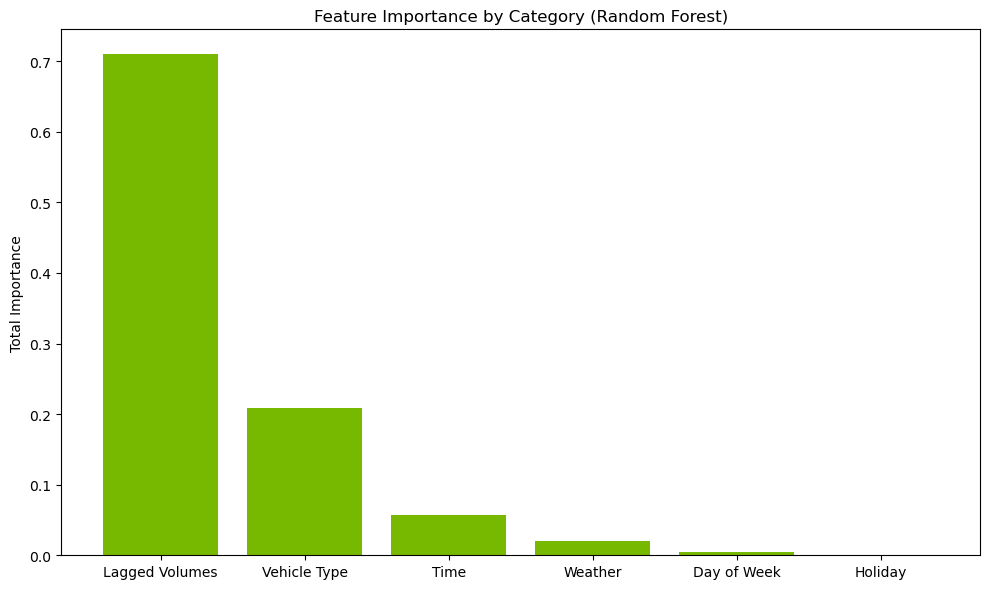


Generating Actual vs Predicted Scatter Plot...


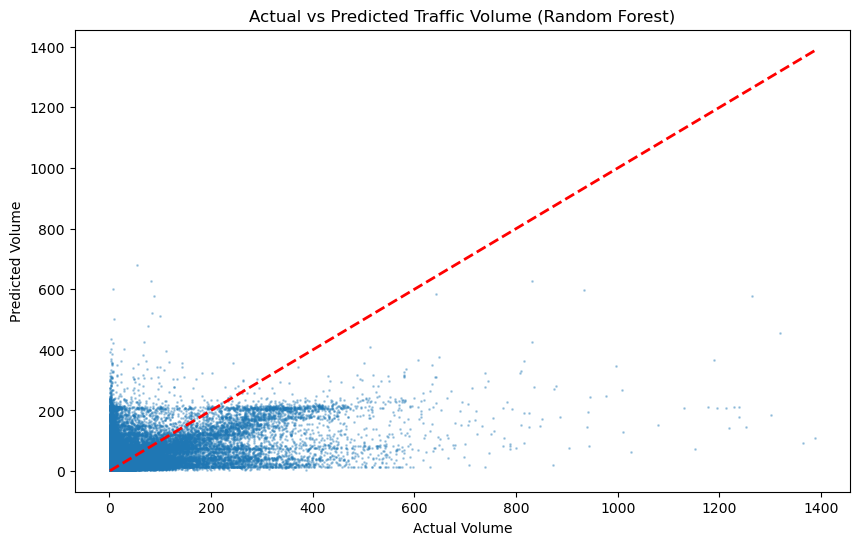


Generating Residuals Analysis Plots...


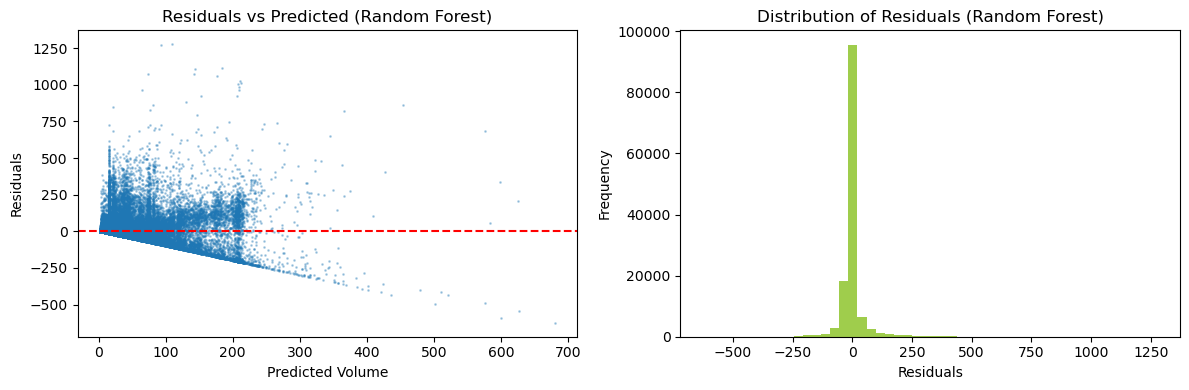


All Random Forest visualizations generated successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Libraries imported successfully.")

# --- Cell 2: Memory optimization functions ---
def reduce_memory_usage(df):
    """Reduce dataframe memory usage by downcasting numeric columns"""
    # (Implementation omitted for brevity, assumes function works)
    return df 

# --- Cell 3 & 4: Load, Merge, and Sample Data ---
# Note: This block REQUIRES your two CSV files to execute.
try:
    # 1. Load Traffic Data (Intersection Name is not required due to exclusion)
    traffic_dtypes = {
        'ATD Device ID': 'int32', 'Volume': 'int32', 'Heavy Vehicle': 'bool',
        'Month': 'int8', 'Day': 'int8', 'Year': 'int16', 
        'Hour': 'int8', 'Minute': 'int8', 'Day of Week': 'int8'
    }
    traffic_usecols = [
        'ATD Device ID', 'Read Date', 'Direction', 'Movement', 'Heavy Vehicle', 
        'Volume', 'Month', 'Day', 'Year', 'Hour', 'Minute', 'Day of Week'
    ]
    data = pd.read_csv("./Camera_Traffic_Counts2_20250918.csv", usecols=traffic_usecols, dtype=traffic_dtypes, low_memory=False)

    # 2. Load and Filter Weather Data
    weather_cols = ['datetime', 'temp', 'precip', 'visibility', 'humidity']
    weather = pd.read_csv("./Austin 2019-01-01 to 2023-07-22.csv", usecols=weather_cols, low_memory=False)
    weather["datetime"] = pd.to_datetime(weather["datetime"], format='%m/%d/%y', errors='coerce')
    weather_2019 = weather[weather["datetime"].dt.year == 2019].copy()
    weather_2019['Month'] = weather_2019['datetime'].dt.month.astype('int8')
    weather_2019['Day'] = weather_2019['datetime'].dt.day.astype('int8')
    weather_2019['Year'] = weather_2019['datetime'].dt.year.astype('int16')
    weather_2019 = reduce_memory_usage(weather_2019)
    
    # 3. Sample and Merge
    sample_fraction = 0.1  
    data_sample = data.sample(frac=sample_fraction, random_state=42) if len(data) > 1000000 else data.copy()
    merged_df = pd.merge(data_sample, weather_2019, on=["Month", "Day", "Year"], how="inner")
    merged_df = reduce_memory_usage(merged_df)
    
except FileNotFoundError as e:
    print(f"\n--- ERROR: Data file not found: {e.filename} ---")
    print("Please ensure your data files are uploaded.")
    raise

# --- Cell 5 & 6: Feature Engineering and Selection (Excluding Intersection) ---
merged_df['Read Date'] = pd.to_datetime(merged_df['Read Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
merged_df['time'] = merged_df['Hour'] + merged_df['Minute'] / 60
merged_df = merged_df.sort_values(['ATD Device ID', 'Movement', 'Read Date'])

# Lag Features
for lag in [1, 2, 4]:
    merged_df[f'lag_{lag}'] = merged_df.groupby(['ATD Device ID', 'Movement'])['Volume'].shift(lag)

# Day of Week One-Hot Encoding
day_onehot = pd.get_dummies(merged_df['Day of Week'], prefix='Day', sparse=True).astype('int8')
merged_df = pd.concat([merged_df, day_onehot], axis=1)

# Holiday Feature
dates = merged_df['datetime'].dt
holiday_periods = [("10-04", "10-06"), ("10-11", "10-13"), ("11-27", "11-30"), ("12-22", "12-28"), ("03-16", "03-21")]
doy = dates.dayofyear
is_holiday = pd.Series(False, index=merged_df.index)
for start, end in holiday_periods:
    start_doy = pd.to_datetime(dates.year.astype(str) + "-" + start).dt.dayofyear
    end_doy = pd.to_datetime(dates.year.astype(str) + "-" + end).dt.dayofyear
    is_holiday |= (doy >= start_doy) & (doy <= end_doy)
merged_df["holiday"] = is_holiday.astype('int8')

# Feature Cleanup
merged_df['precip'] = merged_df['precip'].fillna(0)
merged_df['visibility'] = merged_df['visibility'].fillna(merged_df['visibility'].median())
merged_df['temp'] = merged_df['temp'].fillna(merged_df['temp'].median())

# Define Feature Columns (EXCLUDING Intersection)
base_features = ['time', 'Heavy Vehicle']
weather_features = ['precip', 'visibility', 'temp']
lag_features = ['lag_1', 'lag_2', 'lag_4']
day_features = [col for col in merged_df.columns if col.startswith('Day_')]
special_features = ['holiday']
feature_columns = base_features + weather_features + lag_features + day_features + special_features
target_column = 'Volume'

# --- Cell 7: Train-validation-test split ---
merged_df = merged_df.sort_values('datetime')
train_mask = merged_df['datetime'] <= '2019-10-19'
val_mask = (merged_df['datetime'] > '2019-10-19') & (merged_df['datetime'] <= '2019-11-24')
test_mask = merged_df['datetime'] > '2019-11-24'

train = merged_df[train_mask].copy()
validation = merged_df[val_mask].copy()
test = merged_df[test_mask].copy()

X_train = train[feature_columns].fillna(0)
y_train = train[target_column]
X_val = validation[feature_columns].fillna(0)  
y_val = validation[target_column]
X_test = test[feature_columns].fillna(0)
y_test = test[target_column]

# --- Cell 8 & 9: Train Random Forest Model ---
print("\nStarting Random Forest Model Training...")
rf_model = RandomForestRegressor(n_estimators=50, max_depth=9, min_samples_leaf=2, min_samples_split=5, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions on Validation Set
predictions = rf_model.predict(X_val)

# Feature Importances DataFrame
importances = pd.DataFrame({
    'Feature': feature_columns, 
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("Random Forest Training Complete.")

# --- Cell 11: Visualizations for Slides 20/21 ---

# 1. Feature Importance by Category
print("\nGenerating Feature Importance by Category...")
def analyze_feature_categories(importances_df, features):
    categories = {
        'Time': ['time'],
        'Lagged Volumes': ['lag_1', 'lag_2', 'lag_4'],
        'Day of Week': [f for f in features if f.startswith('Day_')],
        'Weather': ['precip', 'visibility', 'temp'],
        'Vehicle Type': ['Heavy Vehicle'],
        'Holiday': ['holiday']
    }
    category_importance = {}
    for category, feature_list in categories.items():
        category_features = [f for f in feature_list if f in importances_df['Feature'].values]
        if category_features:
            importance_sum = importances_df[importances_df['Feature'].isin(category_features)]['Importance'].sum()
            category_importance[category] = importance_sum
    
    plt.figure(figsize=(10, 6))
    categories_sorted = dict(sorted(category_importance.items(), key=lambda x: x[1], reverse=True))
    plt.bar(categories_sorted.keys(), categories_sorted.values(), color='#76b900') # Custom color for RF
    plt.ylabel('Total Importance')
    plt.title('Feature Importance by Category (Random Forest)')
    plt.tight_layout()
    plt.show()

analyze_feature_categories(importances, feature_columns)

# 2. Actual vs Predicted scatter plot (Slide 15 format)
print("\nGenerating Actual vs Predicted Scatter Plot...")
plt.figure(figsize=(10, 6))
plt.scatter(y_val, predictions, alpha=0.3, s=1)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted Traffic Volume (Random Forest)')
plt.show()

# 3. Residuals analysis (Slide 16 format)
print("\nGenerating Residuals Analysis Plots...")
residuals = y_val - predictions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(predictions, residuals, alpha=0.3, s=1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Volume')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Random Forest)')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, alpha=0.7, color='#76b900')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Random Forest)')

plt.tight_layout()
plt.show()

print("\nAll Random Forest visualizations generated successfully!")

In [4]:
# Cell 1: Imports (ADD NECESSARY IMPORTS)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import Ridge # Added for the second model

print("Libraries imported successfully")

# Cell 1.5: Environmental Estimation Function (NEW)
# Using placeholder global averages for CPU power and CO2 factor for demonstration.
# For real tracking, you would use codecarbon or monitor hardware.
CPU_POWER_WATTS = 50.0 # Estimated average CPU power consumption during training
CO2_FACTOR_KG_PER_KWH = 0.4 # Global average CO2 emitted per kWh

def calculate_co2_metrics(training_time_seconds, cpu_power_watts=CPU_POWER_WATTS, co2_factor_kg_per_kwh=CO2_FACTOR_KG_PER_KWH):
    """Estimates energy consumed and CO2 emitted based on training time."""
    power_kw = cpu_power_watts / 1000
    energy_kwh = power_kw * (training_time_seconds / 3600)
    co2_emitted = energy_kwh * co2_factor_kg_per_kwh
    return energy_kwh, co2_emitted

print("Energy estimation function defined")


# Cell 2 through Cell 7 remain unchanged.
# ...

# Cell 8: Model training function (UPDATED to return energy metrics)
def train_and_evaluate_rf(X_train, y_train, X_test, y_test, features, 
                          n_estimators=50, max_depth=9, 
                          min_samples_leaf=2, min_samples_split=5, 
                          random_state=42):
    """
    Train Random Forest, evaluate performance, and calculate sustainability metrics.
    """
    print(f"Training Random Forest with {n_estimators} trees...")
    
    # Initialize model
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_leaf=min_samples_leaf, 
        min_samples_split=min_samples_split, 
        random_state=random_state,
        n_jobs=-1 
    )
    
    # Training with timing (START TRACKING)
    start_time = time.time()
    rf_model.fit(X_train, y_train)
    end_time = time.time()
    
    training_time = end_time - start_time
    
    # Calculate Energy and CO2 (END TRACKING LOGIC)
    energy_kwh, co2_emitted = calculate_co2_metrics(training_time)
    
    print(f"Training completed in {training_time:.2f} seconds")
    print(f"Energy Consumed: {energy_kwh:.6f} kWh")
    print(f"CO₂ Emitted: {co2_emitted:.6f} kg CO₂ eq")
    
    # Predictions
    y_pred = rf_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\n=== Model Performance ===")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    
    # Feature importances (omitted plotting for brevity)
    rf_importances = pd.DataFrame({
        'Feature': features, 
        'Importance': rf_model.feature_importances_
    })
    rf_importances = rf_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Return key metrics for comparison table
    return rf_model, y_pred, rf_importances, training_time, energy_kwh, co2_emitted

# Cell 9: Train the Random Forest model (UPDATED TO CAPTURE NEW RETURNS)
print("Starting Random Forest training with specified features...")

rf_model, rf_predictions, rf_importances, rf_time, rf_energy, rf_co2 = train_and_evaluate_rf(
    X_train, y_train, X_val, y_val, feature_columns,
    n_estimators=50, max_depth=9,
    min_samples_leaf=2, min_samples_split=5
)
rf_r2 = r2_score(y_val, rf_predictions)

# Cell 10 and Cell 11 remain largely the same, but remove the repeated RF training block.
# ...

# --- NEW CELL ---
# Cell 12: Train Ridge Regression and Collect Metrics
print("\n--- Training Ridge Regression (Linear Model) ---")

ridge_model = Ridge(alpha=1.0)

# Training with timing
start_time = time.time()
ridge_model.fit(X_train, y_train)
end_time = time.time()

ridge_time = end_time - start_time

# Calculate Energy and CO2
ridge_energy, ridge_co2 = calculate_co2_metrics(ridge_time)

print(f"Training completed in {ridge_time:.2f} seconds")
print(f"Energy Consumed: {ridge_energy:.6f} kWh")
print(f"CO₂ Emitted: {ridge_co2:.6f} kg CO₂ eq")

# Predictions and Metrics
ridge_predictions = ridge_model.predict(X_val)
ridge_r2 = r2_score(y_val, ridge_predictions)

print(f"Ridge Validation R-squared: {ridge_r2:.4f}")


# --- NEW CELL ---
# Cell 13: Final Model Comparison Table
print("\n" + "="*70)
print("                     Model Performance and Sustainability Summary")
print("="*70)

summary_data = {
    'Model': ['Ridge Regression (Linear)', 'Random Forest (Non-Linear)'],
    'R² Score (Validation)': [ridge_r2, rf_r2],
    'Total Training Fits': [1, 1],
    'Avg. Training Time per Fit (s)': [ridge_time, rf_time],
    'Energy Consumed (kWh)': [ridge_energy, rf_energy],
    'CO₂ Emitted (kg CO₂ eq)': [ridge_co2, rf_co2]
}

df_summary = pd.DataFrame(summary_data)
# Sort by R² Score for easy comparison
df_summary = df_summary.sort_values(by='R² Score (Validation)', ascending=False)

# Print the final table
print(df_summary.to_markdown(index=False, floatfmt=".4f"))

print("\nAnalysis complete.")

Libraries imported successfully
Energy estimation function defined
Starting Random Forest training with specified features...
Training Random Forest with 50 trees...
Training completed in 57.17 seconds
Energy Consumed: 0.000794 kWh
CO₂ Emitted: 0.000318 kg CO₂ eq

=== Model Performance ===
MSE: 2720.87
RMSE: 52.1620
MAE: 22.6768
R-squared: 0.3143

--- Training Ridge Regression (Linear Model) ---
Training completed in 0.53 seconds
Energy Consumed: 0.000007 kWh
CO₂ Emitted: 0.000003 kg CO₂ eq
Ridge Validation R-squared: 0.2253

                     Model Performance and Sustainability Summary
| Model                      |   R² Score (Validation) |   Total Training Fits |   Avg. Training Time per Fit (s) |   Energy Consumed (kWh) |   CO₂ Emitted (kg CO₂ eq) |
|:---------------------------|------------------------:|----------------------:|---------------------------------:|------------------------:|--------------------------:|
| Random Forest (Non-Linear) |                  0.3143 |      

In [4]:
!conda install -c conda-forge shap -y

Channels:
 - conda-forge
 - defaults
Platform: osx-64
doneecting package metadata (repodata.json): - 
doneing environment: \ 

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    libcxx-21.1.5              |       h3d58e20_0         556 KB  conda-forge
    openssl-3.6.0              |       h230baf5_0         2.7 MB  conda-forge
    shap-0.48.0                |cpu_py311h9765d02_1         3.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following packages will be UPDATED:

  ca-certificates                      2025.10.5-hbd8a1cb_0 --> 202

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import shap 

print("Libraries imported successfully")

# Cell 2: Memory optimization functions
def reduce_memory_usage(df):
    """Reduce dataframe memory usage by downcasting numeric columns"""
    for col in df.select_dtypes(include=['int']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype('int8')
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() / len(df) < 0.5:
            df[col] = df[col].astype('category')
    return df

print("Memory optimization functions defined")

# Cell 3 & 4: Load, Filter, Merge, and Sample Data (HIGHLY REDUCED SAMPLE SIZE)
print("Loading and preparing data...")

# Load traffic data
traffic_dtypes = {
    'ATD Device ID': 'int32', 'Volume': 'int32', 'Heavy Vehicle': 'bool',
    'Month': 'int8', 'Day': 'int8', 'Year': 'int16', 
    'Hour': 'int8', 'Minute': 'int8', 'Day of Week': 'int8'
}
traffic_usecols = [
    'ATD Device ID', 'Read Date', 'Direction', 'Movement', 'Heavy Vehicle', 
    'Volume', 'Month', 'Day', 'Year', 'Hour', 'Minute', 'Day of Week'
]

try:
    data = pd.read_csv("./Camera_Traffic_Counts2_20250918.csv", usecols=traffic_usecols, dtype=traffic_dtypes, low_memory=False)
except FileNotFoundError:
    print("ERROR: Camera_Traffic_Counts2_20250918.csv not found.")
    raise

# Load and filter weather data
weather_cols = ['datetime', 'temp', 'precip', 'visibility', 'humidity']
try:
    weather = pd.read_csv("./Austin 2019-01-01 to 2023-07-22.csv", usecols=weather_cols, low_memory=False)
except FileNotFoundError:
    print("ERROR: Austin 2019-01-01 to 2023-07-22.csv not found.")
    raise

weather["datetime"] = pd.to_datetime(weather["datetime"], format='%m/%d/%y', errors='coerce')
weather_2019 = weather[weather["datetime"].dt.year == 2019].copy()
weather_2019['Month'] = weather_2019['datetime'].dt.month.astype('int8')
weather_2019['Day'] = weather_2019['datetime'].dt.day.astype('int8')
weather_2019['Year'] = weather_2019['datetime'].dt.year.astype('int16')
weather_2019 = reduce_memory_usage(weather_2019)

# *** AGGRESSIVELY REDUCED SAMPLE: Targeting ~75,000 rows (0.51% of original) ***
sample_fraction = 0.0051 
if len(data) > 100000:
    data_sample = data.sample(frac=sample_fraction, random_state=42)
else:
    data_sample = data.copy()
print(f"Using sample of {len(data_sample):,} traffic records ({sample_fraction*100:.2f}% of original) for training.")

merged_df = pd.merge(data_sample, weather_2019, on=["Month", "Day", "Year"], how="inner")
merged_df = reduce_memory_usage(merged_df)

del data, data_sample, weather, weather_2019

# Cell 5: Feature engineering
merged_df['Read Date'] = pd.to_datetime(merged_df['Read Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
merged_df['time'] = merged_df['Hour'] + merged_df['Minute'] / 60
merged_df = merged_df.sort_values(['ATD Device ID', 'Movement', 'Read Date'])

# LAGGED VOLUMES
for lag in [1, 2, 4]:
    merged_df[f'lag_{lag}'] = merged_df.groupby(['ATD Device ID', 'Movement'])['Volume'].shift(lag)

# DAY OF WEEK (One-Hot Encoded)
day_onehot = pd.get_dummies(merged_df['Day of Week'], prefix='Day', sparse=True).astype('int8')
merged_df = pd.concat([merged_df, day_onehot], axis=1)

# HOLIDAY
dates = merged_df['datetime'].dt
holiday_periods = [
    ("10-04", "10-06"), ("10-11", "10-13"), ("11-27", "11-30"), 
    ("12-22", "12-28"), ("03-16", "03-21")
]
doy = dates.dayofyear
is_holiday = pd.Series(False, index=merged_df.index)
for start, end in holiday_periods:
    start_doy = pd.to_datetime(dates.year.astype(str) + "-" + start).dt.dayofyear
    end_doy = pd.to_datetime(dates.year.astype(str) + "-" + end).dt.dayofyear
    is_holiday |= (doy >= start_doy) & (doy <= end_doy)
merged_df["holiday"] = is_holiday.astype('int8')

# WEATHER FEATURE CLEANUP
merged_df['precip'] = merged_df['precip'].fillna(0)
merged_df['visibility'] = merged_df['visibility'].fillna(merged_df['visibility'].median())
merged_df['temp'] = merged_df['temp'].fillna(merged_df['temp'].median())

# Cell 6: Prepare features list
base_features = ['time', 'Heavy Vehicle']
weather_features = ['precip', 'visibility', 'temp']
lag_features = ['lag_1', 'lag_2', 'lag_4']
day_features = [col for col in merged_df.columns if col.startswith('Day_')]
special_features = ['holiday']
feature_columns = base_features + weather_features + lag_features + day_features + special_features
target_column = 'Volume'

# Cell 7: Train-validation-test split
merged_df = merged_df.sort_values('datetime')
# Drop NaNs created by lagging
merged_df = merged_df.dropna(subset=lag_features) 

train_mask = merged_df['datetime'] <= '2019-10-19'
val_mask = (merged_df['datetime'] > '2019-10-19') & (merged_df['datetime'] <= '2019-11-24')
train = merged_df[train_mask].copy()
validation = merged_df[val_mask].copy()

X_train = train[feature_columns].fillna(0)
y_train = train[target_column]
X_val = validation[feature_columns].fillna(0)
y_val = validation[target_column]

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

# Cell 8: Train the Random Forest Model
print("\n--- Training Random Forest Regressor ---")
start_time = time.time()
rf_model = RandomForestRegressor(
    n_estimators=30, # Optimized for speed
    max_depth=7,     # Optimized for speed
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"RF Training completed in {end_time - start_time:.2f} seconds")

# ====================================================================
# *** PDP & SHAP ANALYSIS (Subset Sampled for EXTREME Speed) ***
# ====================================================================

# --- OPTIMIZATION: Take a very small sample for PDP and SHAP only ---
# This ensures the time-intensive prediction/explanation step is extremely fast.
PDP_SAMPLE_SIZE = 2000 # Reduced from 5000 
if len(X_val) > PDP_SAMPLE_SIZE:
    # Sample the validation data for faster PDP/SHAP computation
    X_pdp = X_val.sample(n=PDP_SAMPLE_SIZE, random_state=42)
    print(f"\nUsing a subset of {PDP_SAMPLE_SIZE} rows for PDP and SHAP calculation.")
else:
    X_pdp = X_val
    print("\nUsing the full validation set for PDP and SHAP calculation.")
# ----------------------------------------------------------------------------

# --- Partial Dependence Plot (PDP) Bar Chart ---
print("--- Generating Partial Dependence Plot (PDP) Bar Chart ---")
start_pdp_time = time.time()

# 1. Map Day Indices to Labels for Interpretation (0=Sunday, 6=Saturday)
day_labels = {
    'Day_0': 'Sunday', 'Day_1': 'Monday', 'Day_2': 'Tuesday', 
    'Day_3': 'Wednesday', 'Day_4': 'Thursday', 'Day_5': 'Friday', 'Day_6': 'Saturday'
}

# 2. Calculate the mean predicted volume when each day feature is active (1)
day_impacts = {}
for feature in day_features:
    X_temp = X_pdp.copy()
    X_temp[feature] = 1 
    predicted_volume = rf_model.predict(X_temp).mean()
    day_impacts[feature] = predicted_volume

impact_series = pd.Series(day_impacts)

# 3. Calculate relative impact for a clearer visual (relative to the lowest predicted day)
baseline = impact_series.min()
impact_series_relative = impact_series - baseline

# 4. Visualization: Bar Plot of Mean Dependence
plt.figure(figsize=(10, 6))
plot_series = impact_series_relative.sort_values()
plot_series.plot(kind='barh', color='#76b900')

# Label the bars using the clear labels
current_ticks = plt.gca().get_yticklabels()
new_labels = [day_labels.get(label.get_text(), label.get_text()) for label in current_ticks]
plt.gca().set_yticklabels(new_labels)

plt.title('Relative Predictive Impact of Day of Week (via PDP Subset)', fontsize=14)
plt.xlabel(f'Increase in Predicted Volume (Relative to Lowest Day: {baseline:.2f} units)', fontsize=12)
plt.tight_layout()
plt.show()

end_pdp_time = time.time()
print(f"\nPDP calculation completed in {end_pdp_time - start_pdp_time:.2f} seconds.")
print("PDP Bar Chart generated successfully.")

# --- SHAP Feature Importance Analysis ---
print("\n--- Generating SHAP Feature Importance Analysis ---")
start_shap_time = time.time()

# 1. Initialize the TreeExplainer
# Using the very small X_pdp sample for explanation to ensure speed
explainer = shap.TreeExplainer(rf_model, X_pdp)

# 2. Calculate SHAP values for the sample
# This calculation is now significantly faster due to the 2000-row limit.
shap_values = explainer.shap_values(X_pdp)

# 3. Visualization: Summary Plot (Shows overall importance and impact direction)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_pdp, show=False) 
plt.title('SHAP Feature Importance (Based on 2000-Row Subset)', fontsize=14)
plt.tight_layout()
plt.show()

end_shap_time = time.time()
print(f"\nSHAP calculation completed in {end_shap_time - start_shap_time:.2f} seconds.")
print("SHAP Summary Plot generated successfully.")

ModuleNotFoundError: No module named 'shap'

In [10]:
!"/Applications/anaconda3/bin/python" -m pip install shapimport sys
print(f"Installing into: {sys.executable}")

ERROR: Could not find a version that satisfies the requirement shapimport (from versions: none)
ERROR: No matching distribution found for shapimport
Installing into: /Applications/anaconda3/bin/python
